# 1. Bibliotheken laden

In [11]:
import pandas as pd
import plotly.graph_objects as go
import os
import numpy as np
from dash import Dash, dcc, html, Input, Output, callback
from dash import Dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib as mpl
import locale
import matplotlib.ticker as mticker

# 2. Daten laden

In [48]:
folder_path = 'C:/Users/michi/OneDrive/MSC DV/Python/Projektarbeit DV/flow_all'  #Ordnerpfad allenfalls anpassen
data_frames = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)
        filename = os.path.splitext(file)[0]  #Dateiname
        data['Messstation'] = filename[:3]  #Erste drei Zeichen aus Dateinamen für Messstation
        data_frames.append(data)
        data['Spur'] = filename[5:6]  #Zeichen 5-6 aus Dateinamen für Spur
        data_frames.append(data)

df = pd.concat(data_frames, ignore_index=True) #enthält  die aggregierten Daten mit der zusätzlichen Information "Messtation" in der letzten Spalte

#Diesen Code auskommentieren, wenn 0-Werte eingeblendet werden sollen!
df = df.drop(df[df['measured_value'] == 0].index) #Entferne alle Zeilen, in denen die Spalte "measured_value" den Wert 0 hat
#Grund: Der Wert 0 kommt 1'883'088 Mal in der Spalte 'measured_value' vor --> Aufblähung der Daten

df = df.drop("id", axis="columns")

In [49]:
#Spalten benennen
df.columns = df.columns.str.replace('index', 'Fahrzeugkategorie')
df.columns = df.columns.str.replace('measurement_time', 'Zeitstempel')
df.columns = df.columns.str.replace('measured_value', 'Anzahl Fahrzeuge')

In [44]:
df.head()

,Fahrzeugkategorie,Zeitstempel,Anzahl Fahrzeuge,Messstation,Spur
103,11,2021-12-01 00:00:00+01,24,025,1
104,11,2021-12-01 00:15:00+01,14,025,1
105,11,2021-12-01 00:30:00+01,16,025,1
106,11,2021-12-01 00:45:00+01,5,025,1
108,21,2021-12-01 00:15:00+01,1,025,1


In [52]:
locale.setlocale(locale.LC_TIME, 'de_DE')

#neue Spalten hinzufügen
df['Datum'] = pd.to_datetime(df['Zeitstempel'].str[:10], format='%Y-%m-%d')
df['Zeitstempel'] = pd.to_datetime(df['Zeitstempel'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
#df['Datum'] = df['Zeitstempel'].dt.date
df['Wochentag'] = df['Zeitstempel'].dt.day_name()
df['Wochenende'] = np.where(df['Wochentag'].isin(['Saturday', 'Sunday']), 'ja', 'nein')
df['Stunde'] = df['Zeitstempel'].dt.hour
df['Minuten'] = df['Zeitstempel'].dt.minute
df = df.drop('Zeitstempel', axis=1)

In [53]:
df.head()

,Fahrzeugkategorie,Anzahl Fahrzeuge,Messstation,Spur,Datum,Wochentag,Wochenende,Stunde,Minuten
103,11,24,025,1,2021-12-01,Tuesday,nein,23,0
104,11,14,025,1,2021-12-01,Tuesday,nein,23,15
105,11,16,025,1,2021-12-01,Tuesday,nein,23,30
106,11,5,025,1,2021-12-01,Tuesday,nein,23,45
108,21,1,025,1,2021-12-01,Tuesday,nein,23,15


In [54]:
df.dtypes

Fahrzeugkategorie             int64
Anzahl Fahrzeuge              int64
Messstation                  object
Spur                         object
Datum                datetime64[ns]
Wochentag                    object
Wochenende                   object
Stunde                        int64
Minuten                       int64
dtype: object

# 3. Analyse der einzelnen Spuren
## Messstation 25

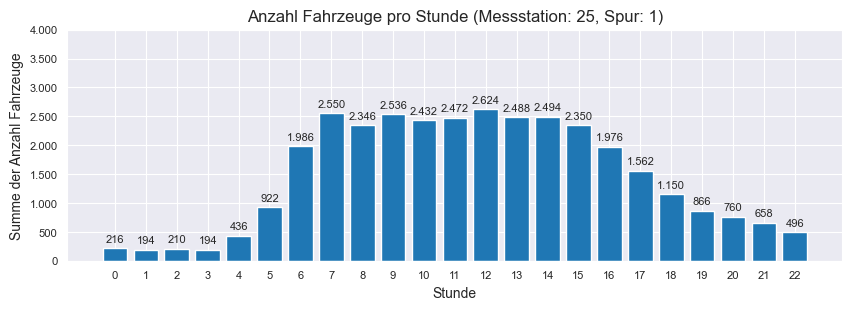

In [73]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['1'])) &
                 (df['Messstation'] == '025') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'] == '2023-02-18')
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 25, Spur: 1'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)
ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

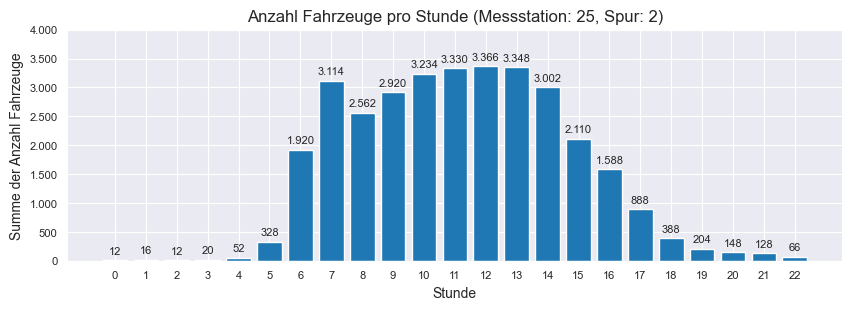

In [74]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['2'])) &
                 (df['Messstation'] == '025') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'] == '2023-02-18')
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 25, Spur: 2'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

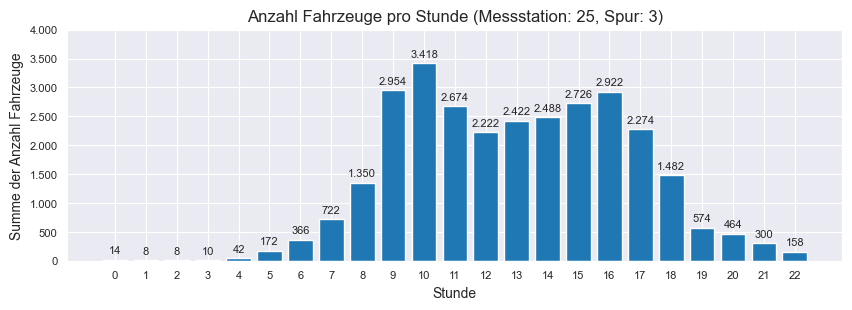

In [75]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['3'])) &
                 (df['Messstation'] == '025') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'] == '2023-02-18')
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 25, Spur: 3'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

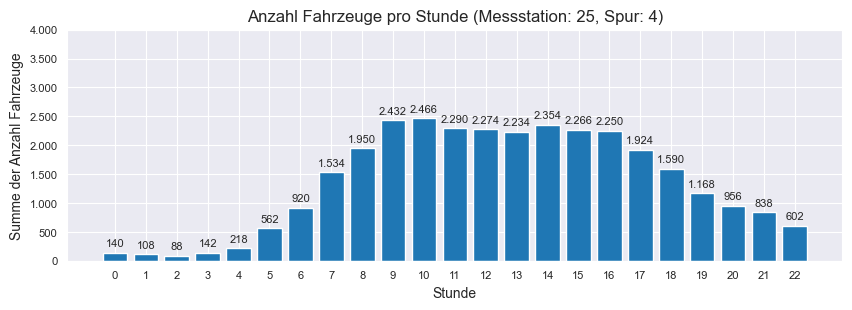

In [76]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['4'])) &
                 (df['Messstation'] == '025') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 25, Spur: 4'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

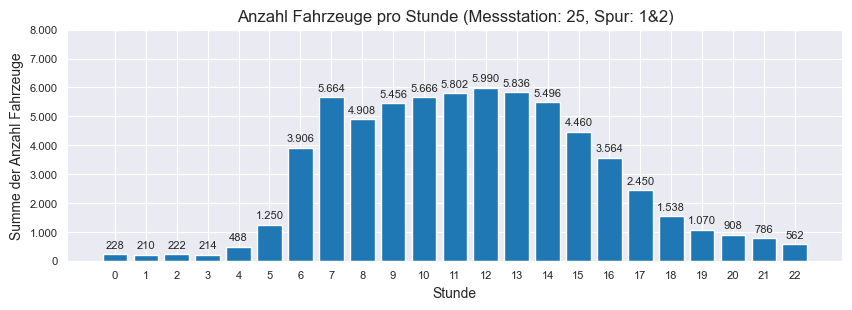

In [78]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['1', '2'])) &
                 (df['Messstation'] == '025') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'] == '2023-02-18')
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 25, Spur: 1&2'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)
ax.set_ylim([0, 8000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

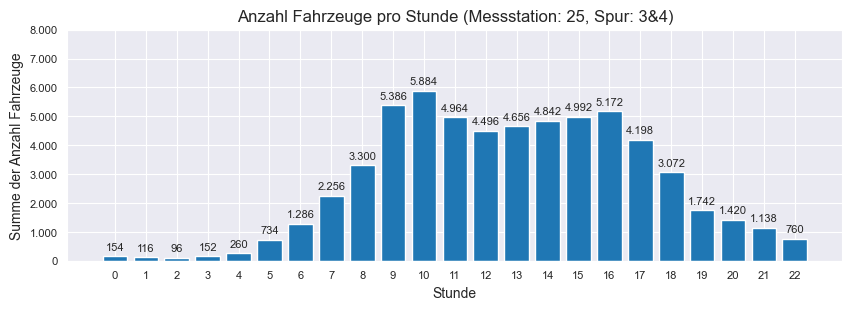

In [79]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['3', '4'])) &
                 (df['Messstation'] == '025') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'] == '2023-02-18')
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 25, Spur: 3&4'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)
ax.set_ylim([0, 8000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

## Messstation 373

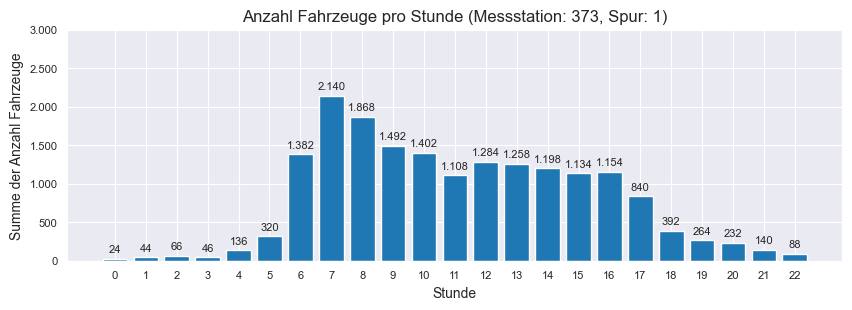

In [82]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['1'])) &
                 (df['Messstation'] == '373') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 373, Spur: 1'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 3000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

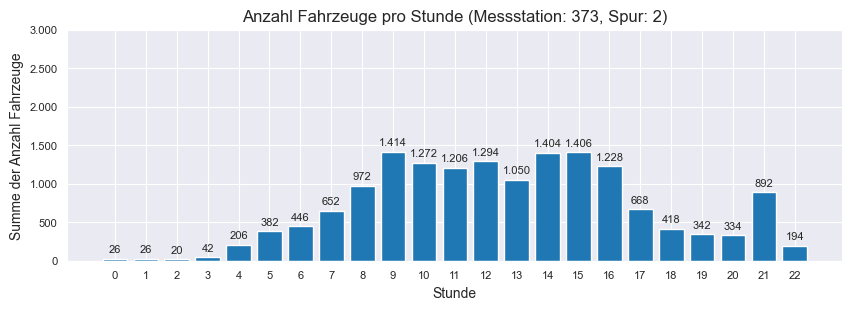

In [83]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['2'])) &
                 (df['Messstation'] == '373') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 373, Spur: 2'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 3000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

C:\Users\michi\AppData\Local\Temp\ipykernel_2012\2016715061.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  (df['Datum'].isin(['18.02.2023']))


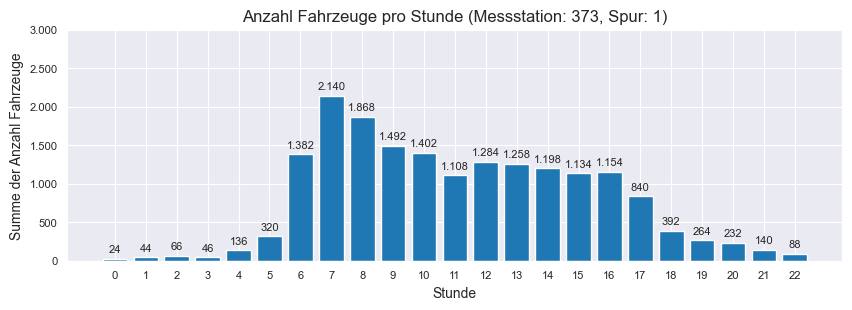

In [84]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['1'])) &
                 (df['Messstation'] == '373') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['18.02.2023']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 373, Spur: 1'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 3000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

C:\Users\michi\AppData\Local\Temp\ipykernel_2012\343887061.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  (df['Datum'].isin(['18.02.2023']))


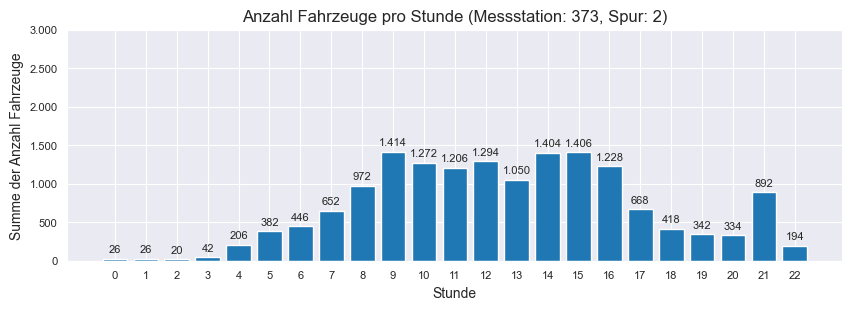

In [85]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['2'])) &
                 (df['Messstation'] == '373') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['18.02.2023']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 373, Spur: 2'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 3000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

## Messstation 318

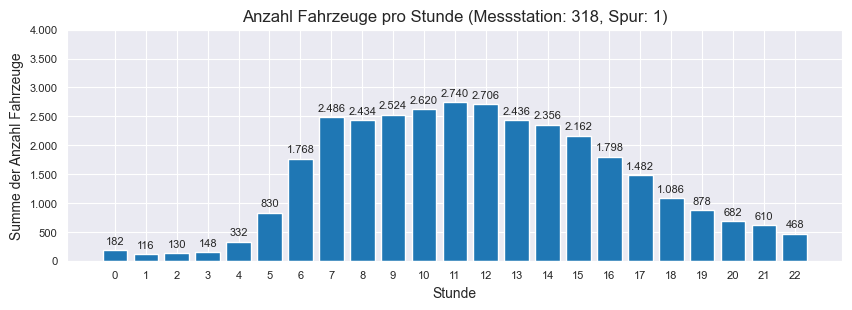

In [86]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['1'])) &
                 (df['Messstation'] == '318') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 318, Spur: 1'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

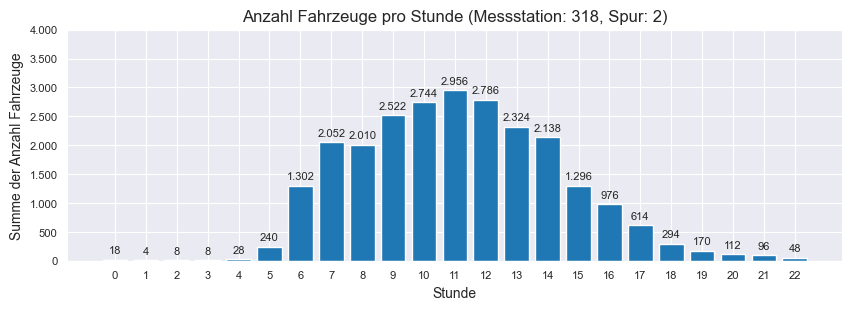

In [87]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['2'])) &
                 (df['Messstation'] == '318') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 318, Spur: 2'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

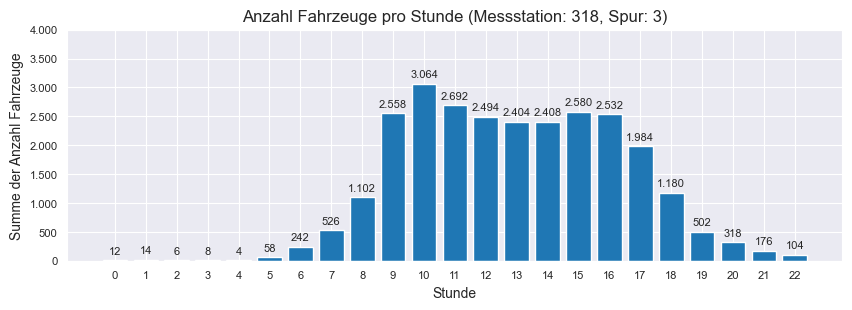

In [88]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['3'])) &
                 (df['Messstation'] == '318') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 318, Spur: 3'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

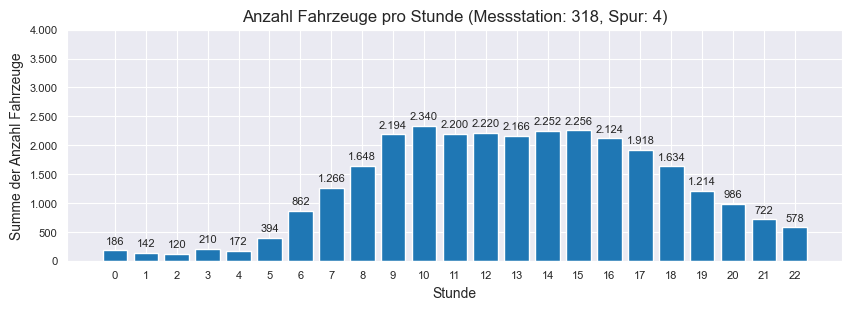

In [89]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['4'])) &
                 (df['Messstation'] == '318') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 318, Spur: 4'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

## Messstation 828

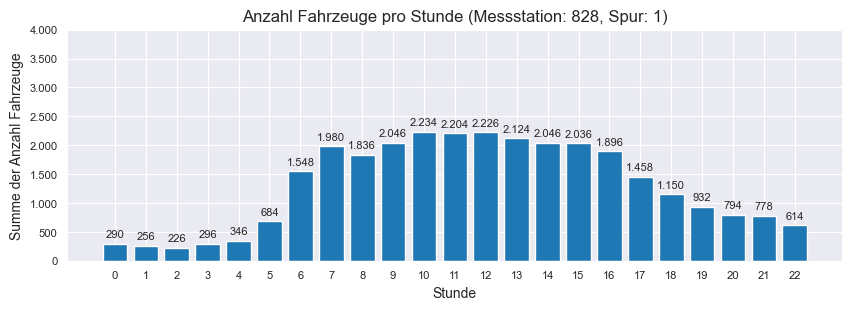

In [90]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['1'])) &
                 (df['Messstation'] == '828') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 828, Spur: 1'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

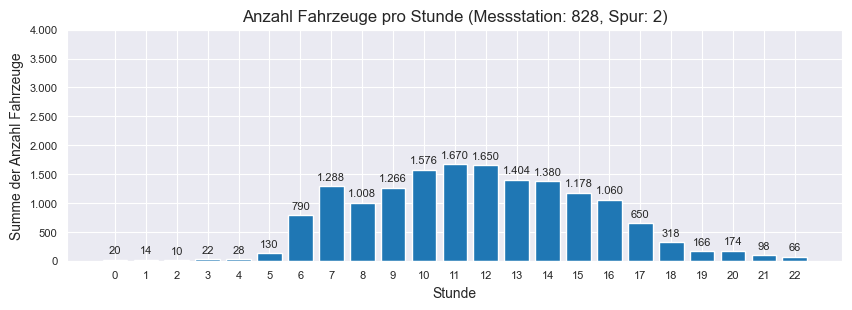

In [91]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['2'])) &
                 (df['Messstation'] == '828') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 828, Spur: 2'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

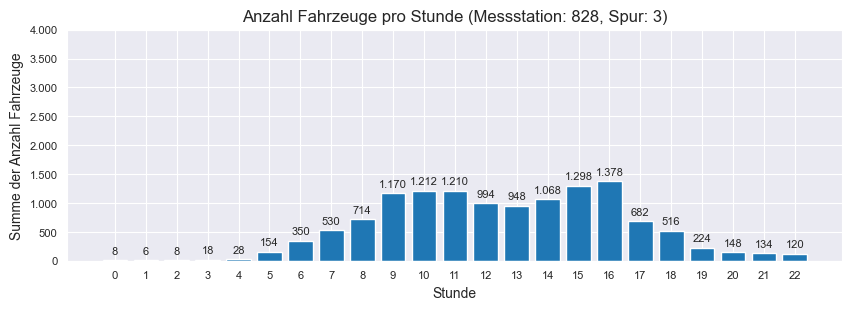

In [92]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['3'])) &
                 (df['Messstation'] == '828') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 828, Spur: 3'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

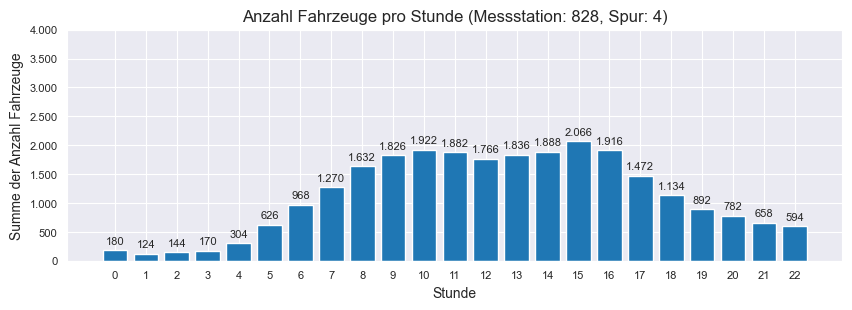

In [93]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['4'])) &
                 (df['Messstation'] == '828') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 828, Spur: 4'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

## Messstation 228

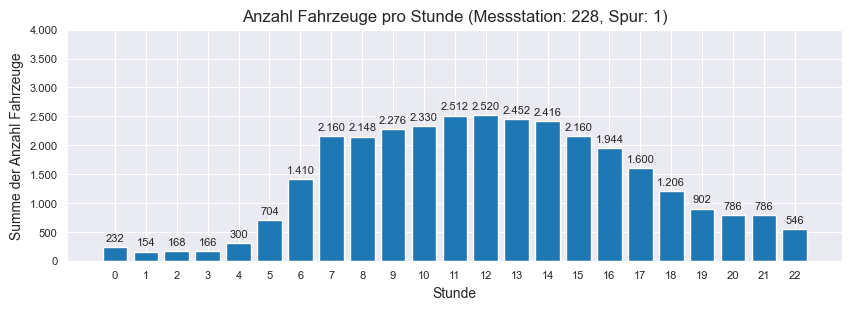

In [94]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['1'])) &
                 (df['Messstation'] == '228') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 228, Spur: 1'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

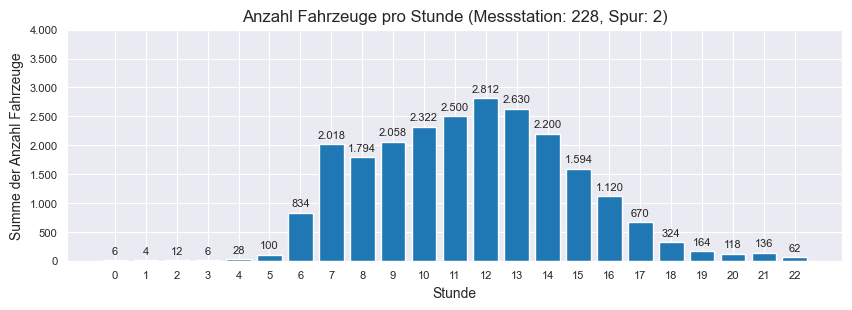

In [95]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['2'])) &
                 (df['Messstation'] == '228') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 228, Spur: 2'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

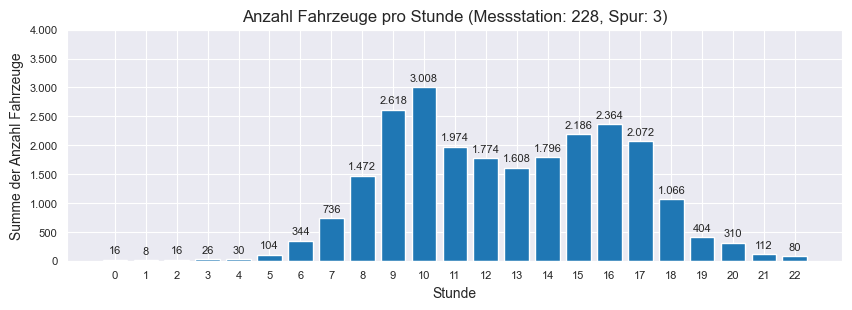

In [96]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['3'])) &
                 (df['Messstation'] == '228') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 228, Spur: 3'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

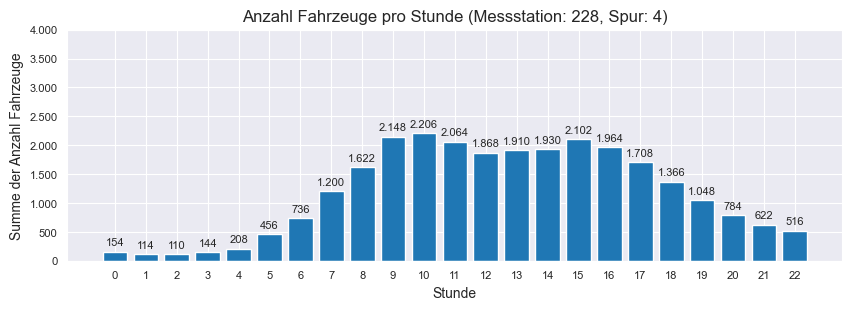

In [97]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['4'])) &
                 (df['Messstation'] == '228') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 228, Spur: 4'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 4000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

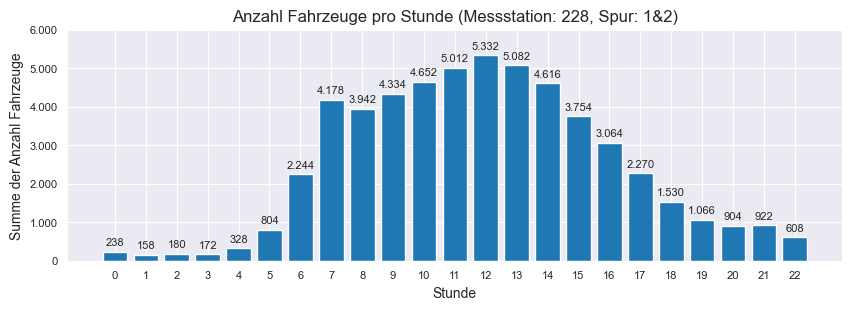

In [100]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['1', '2'])) &
                 (df['Messstation'] == '228') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 228, Spur: 1&2'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 6000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()

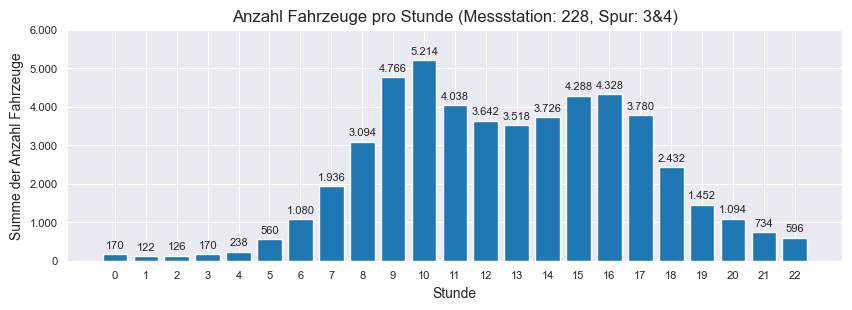

In [99]:
#Filter
filtered_df = df[(df['Fahrzeugkategorie'] == 11) &
                 (df['Spur'].isin(['3', '4'])) &
                 (df['Messstation'] == '228') &
                 (df['Wochenende'] == 'ja') &
                 (df['Datum'].isin(['2023-02-18']))
                 ]
locale.setlocale(locale.LC_ALL, 'de_DE')
#Diagramm erstellen
df_grouped = filtered_df.groupby('Stunde')['Anzahl Fahrzeuge'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(df_grouped['Stunde'], df_grouped['Anzahl Fahrzeuge'])

# Erscheinungsbild
filter_text = 'Messstation: 228, Spur: 3&4'  #Titel manuell anpassen
plt.title(f'Anzahl Fahrzeuge pro Stunde ({filter_text})')
plt.xlabel('Stunde')
plt.ylabel('Summe der Anzahl Fahrzeuge')
plt.xticks(rotation=0)
ax.set_xticks(df_grouped['Stunde'])
ax.set_xticklabels(df_grouped['Stunde'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:n}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylim([0, 6000])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:n}'))
plt.tick_params(axis='both', labelsize=8)

plt.show()